In [51]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [52]:
#Get the stock quote
df = pd.read_csv('btcprices.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['date'].values))
#Show the data
df.tail(5)

,symbol,date,close,volume
2021-01-12,BTC/USD,2021-01-12,34046.4,13744.952017
2021-01-13,BTC/USD,2021-01-13,37390.1,13128.539823
2021-01-14,BTC/USD,2021-01-14,39151.6,10488.496784
2021-01-15,BTC/USD,2021-01-15,36739.8,13486.038390
2021-01-16,BTC/USD,2021-01-16,37064.9,6084.733486


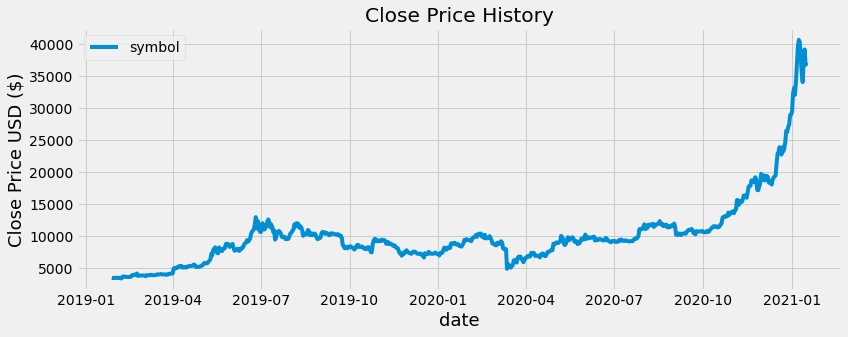

In [53]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [54]:
#Calculate the typical price
typical_price = df["close"]
typical_price

2019-01-28     3431.0
2019-01-29     3395.0
2019-01-30     3436.9
2019-01-31     3409.6
2019-02-01     3437.2
2019-02-02     3466.0
2019-02-03     3415.2
2019-02-04     3413.9
2019-02-05     3429.5
2019-02-06     3367.4
2019-02-07     3357.1
2019-02-08     3622.1
2019-02-09     3625.8
2019-02-10     3650.9
2019-02-11     3591.7
2019-02-12     3588.9
2019-02-13     3579.8
2019-02-14     3562.4
2019-02-15     3567.4
2019-02-16     3580.1
2019-02-17     3625.1
2019-02-18     3870.7
2019-02-19     3888.1
2019-02-20     3943.2
2019-02-21     3897.1
2019-02-22     3941.2
2019-02-23     4113.3
2019-02-24     3732.2
2019-02-25     3819.8
2019-02-26     3796.7
               ...   
2020-12-18    23130.5
2020-12-19    23871.5
2020-12-20    23480.7
2020-12-21    22716.1
2020-12-22    23828.2
2020-12-23    23226.7
2020-12-24    23718.6
2020-12-25    24698.6
2020-12-26    26441.2
2020-12-27    26251.4
2020-12-28    27029.5
2020-12-29    27376.2
2020-12-30    28879.9
2020-12-31    28959.2
2021-01-01

In [55]:
period =  14 #The typical period used for MFI is 14 days

In [56]:
#Calculate the money flow
money_flow = typical_price * df['volume']
money_flow

2019-01-28    1.449215e+07
2019-01-29    1.038964e+07
2019-01-30    7.323728e+06
2019-01-31    7.503287e+06
2019-02-01    9.708986e+06
2019-02-02    4.670412e+06
2019-02-03    4.442591e+06
2019-02-04    4.641641e+06
2019-02-05    4.902082e+06
2019-02-06    7.709633e+06
2019-02-07    5.078902e+06
2019-02-08    1.532694e+07
2019-02-09    6.457402e+06
2019-02-10    4.069547e+06
2019-02-11    4.987836e+06
2019-02-12    4.964275e+06
2019-02-13    3.535504e+06
2019-02-14    2.975038e+06
2019-02-15    3.377574e+06
2019-02-16    3.454497e+06
2019-02-17    5.196376e+06
2019-02-18    1.886569e+07
2019-02-19    1.293305e+07
2019-02-20    8.178214e+06
2019-02-21    7.165157e+06
2019-02-22    6.759095e+06
2019-02-23    1.210845e+07
2019-02-24    1.582621e+07
2019-02-25    8.883411e+06
2019-02-26    7.177277e+06
                  ...     
2020-12-18    1.399612e+08
2020-12-19    1.493193e+08
2020-12-20    1.379750e+08
2020-12-21    2.449519e+08
2020-12-22    1.364881e+08
2020-12-23    2.051046e+08
2

In [57]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)

In [58]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [59]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([55.38651533, 60.80156402, 53.07616444, 55.36101226, 52.93936913,
       49.07674673, 54.41268459, 60.65472063, 66.8113904 , 74.46051066,
       74.10949945, 74.64172664, 72.30350576, 61.60727451, 69.38710496,
       67.02064821, 71.9110007 , 67.76453107, 68.93442949, 69.00491619,
       67.06789917, 63.30565491, 60.00672658, 58.52939251, 65.15586589,
       58.5737363 , 58.75309499, 61.91721968, 53.482339  , 61.5007542 ,
       53.97165203, 63.22133212, 61.84198892, 62.20487471, 57.29077308,
       62.00223426, 61.09113857, 59.33702674, 50.05203815, 60.37084764,
       53.31725616, 55.84350916, 55.78415775, 57.70473825, 65.23020729,
       56.78118914, 57.05241401, 59.17097522, 67.59229967, 67.42456187,
       69.21771831, 79.8635577 , 62.75445258, 64.9087834 , 62.95866951,
       66.01120233, 69.06649229, 62.53552021, 63.79883648, 60.15339237,
       62.30909621, 58.50210163, 58.69054151, 57.19710925, 56.97166801,
       49.48931491, 64.35316226, 62.44341148, 68.33373792, 63.20

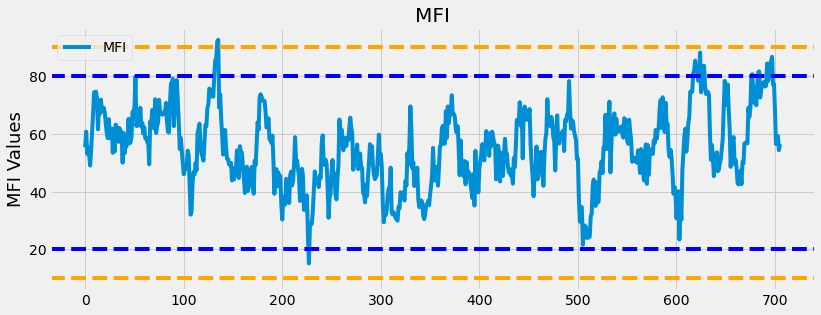

In [60]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [61]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
#Show the new data frame
new_df

,symbol,date,close,volume,MFI
2019-02-11,BTC/USD,2019-02-11,3591.7,1388.711757,55.386515
2019-02-12,BTC/USD,2019-02-12,3588.9,1383.230142,60.801564
2019-02-13,BTC/USD,2019-02-13,3579.8,987.626044,53.076164
2019-02-14,BTC/USD,2019-02-14,3562.4,835.121726,55.361012
2019-02-15,BTC/USD,2019-02-15,3567.4,946.788575,52.939369
2019-02-16,BTC/USD,2019-02-16,3580.1,964.916325,49.076747
2019-02-17,BTC/USD,2019-02-17,3625.1,1433.443477,54.412685
2019-02-18,BTC/USD,2019-02-18,3870.7,4873.974056,60.654721
2019-02-19,BTC/USD,2019-02-19,3888.1,3326.315177,66.811390
2019-02-20,BTC/USD,2019-02-20,3943.2,2074.004383,74.460511


In [62]:
# Create a function to get the buy and sell signals
#MFI above 80 is considered overbought condition and MFI below 20 is considered oversold.
#MFI > 80 then Sell
#MFI < 20 then Buy
def get_signal(data, high, low):
  
    buy_signal = [] #The stock was over sold
    sell_signal = [] #The stock was over bought

    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:#Then the stock is over bought, you should sell 
      
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
        elif data['MFI'][i] < low: #Then the stock is over sold, you should buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
      
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
        
    return (buy_signal, sell_signal)

In [63]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

,symbol,date,close,volume,MFI,Buy,Sell
2019-02-11,BTC/USD,2019-02-11,3591.7,1388.711757,55.386515,NaN,NaN
2019-02-12,BTC/USD,2019-02-12,3588.9,1383.230142,60.801564,NaN,NaN
2019-02-13,BTC/USD,2019-02-13,3579.8,987.626044,53.076164,NaN,NaN
2019-02-14,BTC/USD,2019-02-14,3562.4,835.121726,55.361012,NaN,NaN
2019-02-15,BTC/USD,2019-02-15,3567.4,946.788575,52.939369,NaN,NaN
2019-02-16,BTC/USD,2019-02-16,3580.1,964.916325,49.076747,NaN,NaN
2019-02-17,BTC/USD,2019-02-17,3625.1,1433.443477,54.412685,NaN,NaN
2019-02-18,BTC/USD,2019-02-18,3870.7,4873.974056,60.654721,NaN,NaN
2019-02-19,BTC/USD,2019-02-19,3888.1,3326.315177,66.811390,NaN,NaN
2019-02-20,BTC/USD,2019-02-20,3943.2,2074.004383,74.460511,NaN,NaN


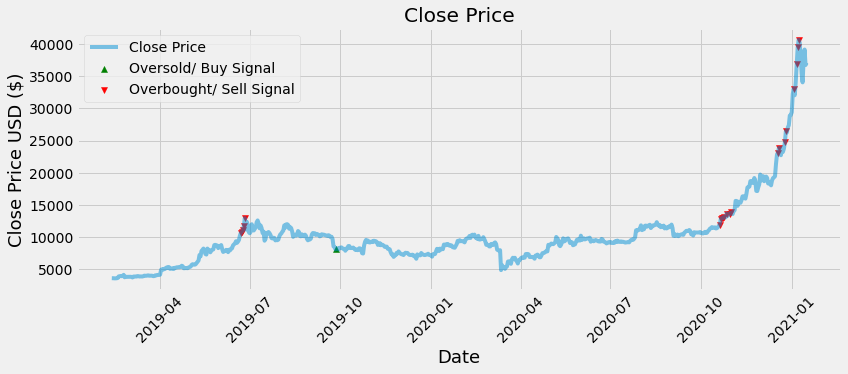

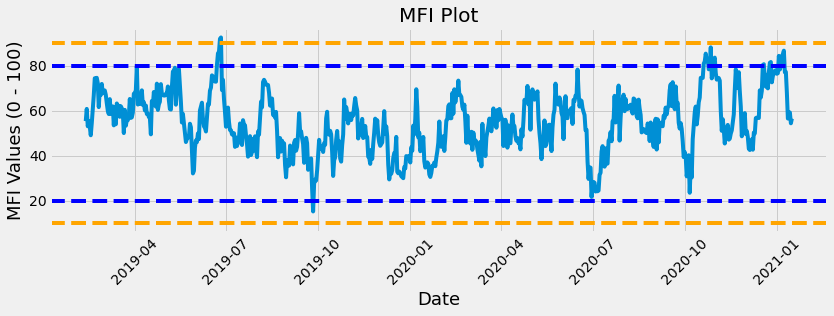

In [64]:
# plot the close price history
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(12.4,3.5))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()

In [65]:
# convert to csv
new_df.to_csv(r"mfi_btc.csv", index = False)